## Modelo ecuaciones diferenciales

\begin{array}{l}{\cdot H^{\prime}=b H-\left(d+\left(\frac{r}{K}\right) H\right) H-\propto H Z} \\ {\cdot Z^{\prime}=\alpha H Z-\beta H Z+\frac{1}{2}\left(d+\left(\frac{r}{K}\right) H\right) H} \\ {\cdot R^{\prime}=\beta H Z+\frac{1}{2}\left(d+\left(\frac{r}{K}\right) H\right) H}\end{array}


# Variables:


H población humana


Z población Zombie


R población removida

# Parámetros :


a = constante de proporcionalidad de la tasa de muerte modificada 


c= constante de proporcionalidad de la tasa de natalidad modificada


b =tasa de natalidad humana natural = 4%


d =tasa de muerte humana natural = 6%


r =tasa de reproducción natural = 1%


K =capacidad de carga de la población humana 10,000 millones 


α =tasa de infección humana = 0.7


β =tasa de erradicación Zombies = 0.2 

# Variables Iniciales 


H(0) =7 millones de habitantes


Z(0) = 1


R(0) = 0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
 

In [27]:
b = 0.04
d = 0.06
r = 0.01
K = 10*10**9 
alfa = 0.70 
beta = 0.20 
hzr0 = np.array([7*10**9,1, 0])

In [28]:
def Zombies(hzr, t, b, d, r, K, alfa, beta):
    H = hzr[0]
    Z = hzr[1]
    R = hzr[2]
    return np.array([
                        b*H - (d + (r/K)*H)*H - alfa*H*Z, 
                        alfa*H*Z - beta*H*Z + (1/2)*(d + (r/K)*H)*H, 
                        beta*H*Z + (1/2)*(d + (r/K)*H)*H
                    ])

In [29]:
t = np.linspace(0, 1e-8, 500)
p = odeint(Zombies, hzr0, t, args=(b, d, r, K, alfa, beta))
H = p[:, 0]
Z = p[:, 1]
R = p[:, 2]

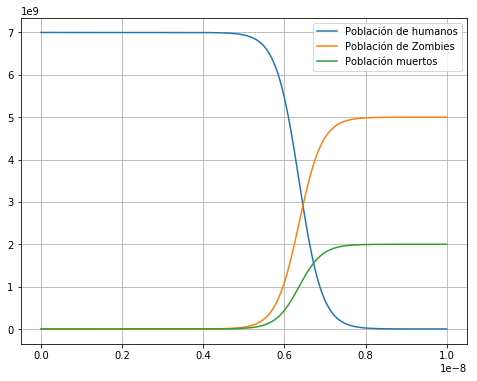

In [30]:
plt.figure(figsize=(8,6))
plt.plot(t, H, label="Población de humanos")
plt.plot(t, Z, label="Población de Zombies")
plt.plot(t, R, label="Población muertos")
plt.grid()
plt.legend(loc="best")
plt.show()

In [19]:
def ZombiesPunto(t = 0):
    t = np.linspace(0, t, 5)
    p = odeint(Zombies, hzr0, t, args=(b, d, r, K, alfa, beta))
    H = p[:,0]
    Z = p[:,1]
    R = p[:,2]
    plt.figure(figsize=(8,6))
    plt.plot(t, H, label="Población de humanos")
    plt.plot(t, Z,label="Población de Zombies")
    plt.plot(t, R, label="Población muertos")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

In [20]:
interact_manual(ZombiesPunto, t = (0, 5,.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, step=0.01), Button(description='Run Int…